In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import random
from math import sqrt
from datetime import datetime
random.seed(22)

from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [ ]:
!pip install wandb
import wandb

     |████████████████████████████████| 2.1MB 5.3MB/s 
     |████████████████████████████████| 102kB 6.7MB/s 
     |████████████████████████████████| 133kB 16.7MB/s 
     |████████████████████████████████| 163kB 19.4MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=bcc5459eb1f34da9ce7f76189cfb47dc8c1f0ff106fa265d081c443796898383
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=7dbb435bd97f3164ff4b3898b47b2732f94e096f2f2133cf774987621cd5961e
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# rename project with the new project you create
proj = 'MajorProj1'
run_name = 'basic_NN_Pytorch'
wandb.init(project=proj, entity='pct101', name=run_name)

wandb: Currently logged in as: ck20 (use `wandb login --relogin` to force relogin)


In [2]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          426 non-null    object 
 1   new_cases     426 non-null    int64  
 2   total_cases   426 non-null    int64  
 3   active_cases  426 non-null    float64
 4   mobilty       426 non-null    float64
 5   does1         426 non-null    int64  
 6   dose2         426 non-null    int64  
 7   new_deaths    426 non-null    int64  
 8   total_deaths  426 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 30.1+ KB


In [3]:
df.head()

,date,new_cases,total_cases,active_cases,mobilty,does1,dose2,new_deaths,total_deaths
0,2020-02-11,1,1,1.0,109.07,0,0,0,0
1,2020-02-12,0,1,0.0,111.20,0,0,0,0
2,2020-02-13,0,1,0.0,110.18,0,0,0,0
3,2020-02-14,0,1,0.0,123.91,0,0,0,0
4,2020-02-15,0,1,0.0,131.79,0,0,0,0


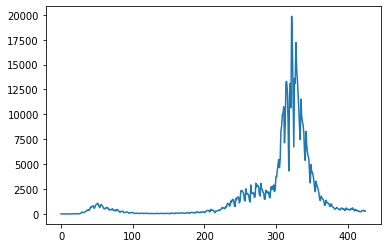

In [ ]:
plt.plot(df['new_cases'])
plt.show()

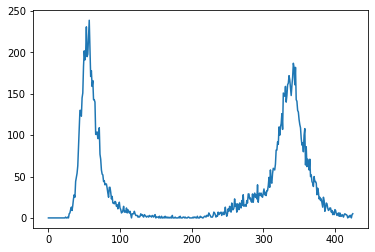

In [ ]:
plt.plot(df['new_deaths'])
plt.show()

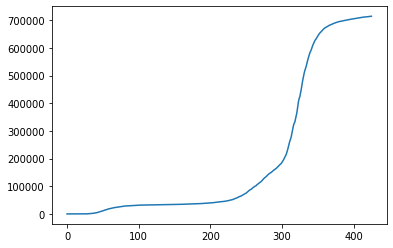

In [ ]:
plt.plot(df['total_cases'])
plt.show()

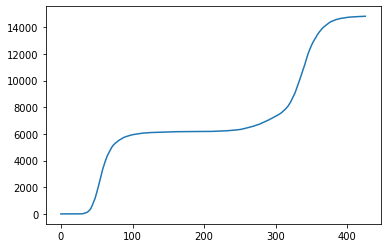

In [ ]:
plt.plot(df['total_deaths'])
plt.show()

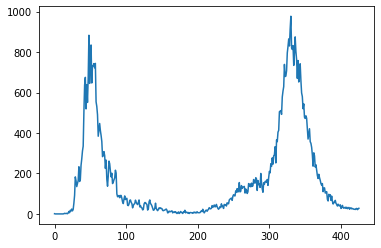

In [ ]:
plt.plot(df['active_cases'])
plt.show()

In [11]:
y1 = df['new_deaths']
y2 = df['total_deaths']

new_cases = df['new_cases']
total_cases = df['total_cases']

# X = df.drop(['new_deaths', 'total_deaths', 'new_cases'], axis=1)
# X = df.drop(['new_deaths', 'total_deaths', 'total_cases'], axis=1)
X = df.drop(['new_deaths', 'total_deaths', 'new_cases', 'total_cases'], axis=1)

y1 = y1.values.reshape((-1, 1))
y2 = y2.values.reshape((-1, 1))
print(X.head())
print(X.shape, y1.shape, y2.shape, type(X), type(y1), type(y2))

         date  active_cases  mobilty  does1  dose2
0  2020-02-11           1.0   109.07      0      0
1  2020-02-12           0.0   111.20      0      0
2  2020-02-13           0.0   110.18      0      0
3  2020-02-14           0.0   123.91      0      0
4  2020-02-15           0.0   131.79      0      0
(426, 5) (426, 1) (426, 1) <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [12]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=42)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(298, 5) (128, 5) (298, 1) (128, 1)


In [13]:
# removing the date
dates1 = X['date']
dates1_train = X1_train['date']
dates1_test = X1_test['date']
X1_train.drop('date', inplace=True, axis=1)
X1_test.drop('date', inplace=True, axis=1)

dates2 = X['date']
dates2_train = X2_train['date']
dates2_test = X2_test['date']
X2_train.drop('date', inplace=True, axis=1)
X2_test.drop('date', inplace=True, axis=1)

X.drop('date', inplace=True, axis=1)

print(dates1.shape, dates1_train.shape, dates1_test.shape, X.shape, X1_train.shape, X1_test.shape)

(426,) (298,) (128,) (426, 4) (298, 4) (128, 4)


In [14]:
from sklearn.preprocessing import StandardScaler

scx1 = StandardScaler()
scy1 = StandardScaler()
X1_train_std = scx1.fit_transform(X1_train)
X1_test_std = scx1.transform(X1_test)
y1_train_std = scy1.fit_transform(y1_train)
y1_test_std = scy1.transform(y1_test)
print(X1_train_std.shape, X1_test_std.shape, y1_train_std.shape, y1_test_std.shape)

scx2 = StandardScaler()
scy2 = StandardScaler()
X2_train_std = scx2.fit_transform(X2_train)
X2_test_std = scx2.transform(X2_test)
y2_train_std = scy2.fit_transform(y2_train)
y2_test_std = scy2.transform(y2_test)
print(X2_train_std.shape, X2_test_std.shape, y2_train_std.shape, y2_test_std.shape)

(298, 4) (128, 4) (298, 1) (128, 1)
(298, 4) (128, 4) (298, 1) (128, 1)


In [8]:
y1_train_std = np.squeeze(y1_train_std)
y1_test_std = np.squeeze(y1_test_std)
y1 = np.squeeze(y1)

y2_train_std = np.squeeze(y2_train_std)
y2_test_std = np.squeeze(y2_test_std)
y2 = np.squeeze(y2)

print(y1_train_std.shape, y1_test_std.shape, y1.shape)
print(y2_train_std.shape, y2_test_std.shape, y2.shape)

(298,) (128,) (426,)
(298,) (128,) (426,)


In [9]:
# SVR model for new deaths
reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
reg.fit(X1_train_std, y1_train_std)
y1_pred = reg.predict(X1_test_std)
rmse = sqrt(mean_squared_error(y1_test_std, y1_pred))
print(rmse)
print(reg.score(X1_test_std, y1_test_std))

0.29994203465794483
0.9065585821787425


In [10]:
reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
reg.fit(X2_train_std, y2_train_std)
y2_pred = reg.predict(X2_test_std)
rmse = sqrt(mean_squared_error(y2_test_std, y2_pred))
print(rmse)
print(reg.score(X2_test_std, y2_test_std))

0.3189843070714174
0.9185223306576707


(128, 4) (128, 1)


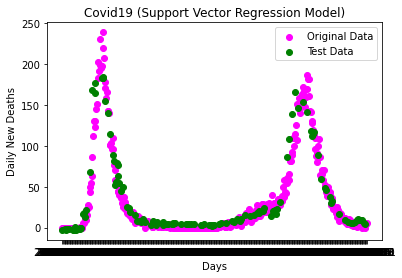

In [107]:
# plotting predictions for new deaths
y1_pred_plt = np.array(scy1.inverse_transform(y1_pred))
y1_pred_plt = y1_pred_plt.reshape((-1, 1))
y1_plt = y1.reshape((-1, 1))

print(X1_test.shape, y1_pred_plt.shape)

#plot the regression fit with original data

plt.scatter(dates1.values, y1_plt, color = 'magenta', label = 'Original Data')
plt.scatter(dates1_test.values, y1_pred_plt, color = 'green', label = 'Test Data')
plt.title('Covid19 (Support Vector Regression Model)')
plt.xlabel('Days')
plt.ylabel('Daily New Deaths')
plt.legend()
plt.show()

(128, 4) (128, 1)


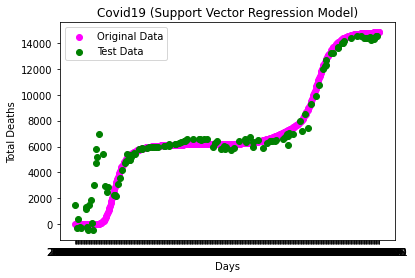

In [108]:
# plotting predictions for total deaths
y2_pred_plt = np.array(scy2.inverse_transform(y2_pred))
y2_pred_plt = y2_pred_plt.reshape((-1, 1))
y2_plt = y2.reshape((-1, 1))

print(X2_test.shape, y2_pred_plt.shape)

#plot the regression fit with original data

plt.scatter(dates2.values, y2_plt, color = 'magenta', label = 'Original Data')
plt.scatter(dates2_test.values, y2_pred_plt, color = 'green', label = 'Test Data')
plt.title('Covid19 (Support Vector Regression Model)')
plt.xlabel('Days')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

In [109]:
reg = LinearRegression()
reg.fit(X1_train_std, y1_train_std)
y1_pred = reg.predict(X1_test_std)
rmse = sqrt(mean_squared_error(y1_test_std, y1_pred))
print(rmse)
print(reg.score(X1_test_std, y1_test_std))

0.3721839382719431
0.8561267655164494


In [110]:
reg = LinearRegression()
reg.fit(X2_train_std, y2_train_std)
y2_pred = reg.predict(X2_test_std)
rmse = sqrt(mean_squared_error(y2_test_std, y2_pred))
print(rmse)
print(reg.score(X2_test_std, y2_test_std))

0.6367600717451137
0.6753229375465224


(128, 4) (128, 1)


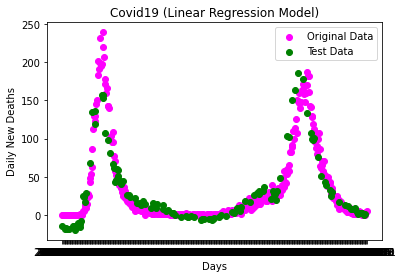

In [111]:

# plotting predictions for new deaths
y1_pred_plt = np.array(scy1.inverse_transform(y1_pred))
y1_pred_plt = y1_pred_plt.reshape((-1, 1))
y1_plt = y1.reshape((-1, 1))

print(X1_test.shape, y1_pred_plt.shape)

#plot the regression fit with original data

plt.scatter(dates1.values, y1_plt, color = 'magenta', label = 'Original Data')
plt.scatter(dates1_test.values, y1_pred_plt, color = 'green', label = 'Test Data')
plt.title('Covid19 (Linear Regression Model)')
plt.xlabel('Days')
plt.ylabel('Daily New Deaths')
plt.legend()
plt.show()

(128, 4) (128, 1)


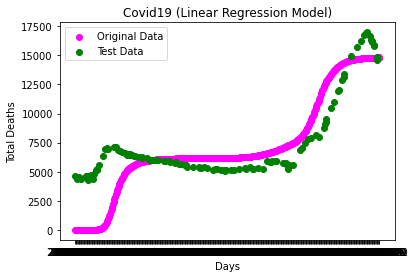

In [112]:
# plotting predictions for total deaths
y2_pred_plt = np.array(scy2.inverse_transform(y2_pred))
y2_pred_plt = y2_pred_plt.reshape((-1, 1))
y2_plt = y2.reshape((-1, 1))

print(X2_test.shape, y2_pred_plt.shape)

#plot the regression fit with original data

plt.scatter(dates2.values, y2_plt, color = 'magenta', label = 'Original Data')
plt.scatter(dates2_test.values, y2_pred_plt, color = 'green', label = 'Test Data')
plt.title('Covid19 (Linear Regression Model)')
plt.xlabel('Days')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

## Results

TC, ND (SVR): 0.56 rmse, 0.67 score

TC, TD (SVR): 0.32 rmse, 0.91 score

TC, ND (LR): 0.72 rmse, 0.45 score

TC, TD (LR): 0.48 rmse, 0.81 score

NC, ND (SVR): 0.53 rmse, 0.70 score

NC, TD (SVR): 0.34 rmse, 0.90 score

NC, ND (LR): 0.73 rmse, 0.43 score

NC, TD (LR): 0.57 rmse, 0.73 score

In [ ]:
from fbprophet import Prophet

new_df = df[['date', 'total_deaths']]
new_df.columns = ['ds', 'y']
print(new_df.tail())

model = Prophet(interval_width=0.95)
model.fit(new_df)
future = model.make_future_dataframe(periods=90)
print(future.tail())

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

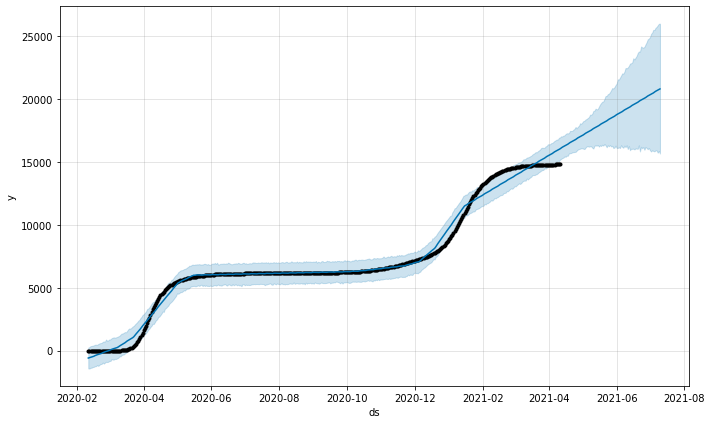

In [ ]:
confirmed_forecast_plot = model.plot(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
#@title
from fbprophet import Prophet

new_df = df[['date', 'new_deaths']]
new_df.columns = ['ds', 'y']
print(new_df.tail())

model = Prophet()
model.fit(new_df)
future = model.make_future_dataframe(periods=30)
print(future.tail())

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

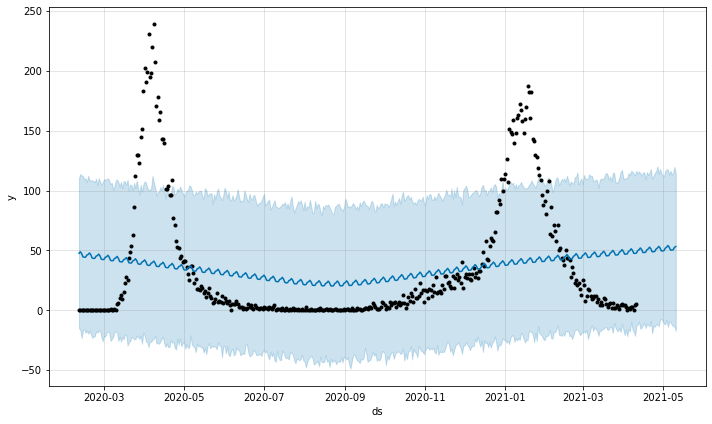

In [ ]:
confirmed_forecast_plot = model.plot(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
wandb.sklearn.plot_regressor(reg, X1_train_std, X1_test_std, y1_train_std, y1_test_std,  model_name=name)

In [123]:
from datetime import datetime
import torch

# X1_train_std = X1_train_std.transpose()
# X1_test_std = X2_test_std.transpose()

X1_train_nn = torch.from_numpy(X1_train_std.astype(np.float32)).view(298, 4)
X1_test_nn = torch.from_numpy(X1_test_std.astype(np.float32)).view(128, 4)
y1_train_nn = torch.from_numpy(y1_train_std.astype(np.float32)).view(298,1)
y1_test_nn = torch.from_numpy(y1_test_std.astype(np.float32)).view(128,1)

X2_train_nn = torch.from_numpy(X2_train_std.astype(np.float32)).view(298, 4)
X2_test_nn = torch.from_numpy(X2_test_std.astype(np.float32)).view(128, 4)
y2_train_nn = torch.from_numpy(y2_train_std.astype(np.float32)).view(298,1)
y2_test_nn = torch.from_numpy(y2_test_std.astype(np.float32)).view(128,1)

In [124]:
model1 = torch.nn.Linear(4, 1)
loss_fn = torch.nn.MSELoss()
# wandb.watch(model, log_freq=100)

learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model1.parameters(), lr=learning_rate)

start_time = datetime.now()

for t in range(2000):
    y1_pred = model1(X1_train_nn)

    # loss = loss_fn(y2_pred, y2_train_nn)
    RMSE_loss = torch.sqrt(loss_fn(y1_pred, y1_train_nn))
    
    optimizer.zero_grad()

    RMSE_loss.backward()

    optimizer.step()

    if t%100 == 99:
        print(t+1, RMSE_loss.item())
        # wandb.log({"loss": RMSE_loss})

print(f"\nTrained in {datetime.now() - start_time}\n")

100 0.4738813042640686
200 0.4025264382362366
300 0.3712165355682373
400 0.3602161407470703
500 0.3574620485305786
600 0.357111394405365
700 0.3570995330810547
800 0.35710039734840393
900 0.35710084438323975
1000 0.35710030794143677
1100 0.35710039734840393
1200 0.35710081458091736
1300 0.357101172208786
1400 0.3570994734764099
1500 0.3571009635925293
1600 0.3571031987667084
1700 0.35710203647613525
1800 0.35710135102272034
1900 0.357101708650589
2000 0.35710203647613525

Trained in 0:00:00.654701



torch.Size([128, 1])


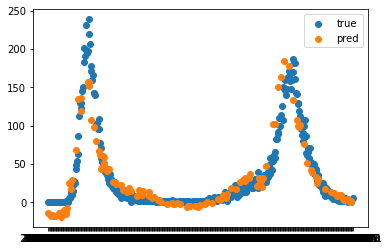

In [125]:
y1_pred = model1(X1_test_nn).detach()
print(y1_pred.shape)
y1_pred_plt = np.array(scy1.inverse_transform(y1_pred))
y1_pred_plt = y1_pred_plt.reshape((-1, 1))
y1_plt = df['new_deaths'].values.reshape((-1, 1))

plt.scatter(dates1.values, y1_plt, label="true")
plt.scatter(dates1_test.values, y1_pred_plt, label="pred")
plt.legend()

In [121]:
model = torch.nn.Linear(4, 1)
loss_fn = torch.nn.MSELoss()
# wandb.watch(model, log_freq=100)

learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

start_time = datetime.now()

for t in range(2000):
    y2_pred = model(X2_train_nn)

    # loss = loss_fn(y2_pred, y2_train_nn)
    RMSE_loss = torch.sqrt(loss_fn(y2_pred, y2_train_nn))
    
    optimizer.zero_grad()

    RMSE_loss.backward()

    optimizer.step()

    if t%100 == 99:
        print(t+1, RMSE_loss.item())
        # wandb.log({"loss": RMSE_loss})

print(f"\nTrained in {datetime.now() - start_time}\n")

100 0.8908601403236389
200 0.7544832229614258
300 0.6746151447296143
400 0.6316011548042297
500 0.6105695366859436
600 0.5955486297607422
700 0.5811823010444641
800 0.568701982498169
900 0.559337854385376
1000 0.5533589124679565
1100 0.550305187702179
1200 0.5492243766784668
1300 0.54902583360672
1400 0.5490145683288574
1500 0.549015462398529
1600 0.5490149855613708
1700 0.5490151047706604
1800 0.5490153431892395
1900 0.5490157008171082
2000 0.5490157008171082

Trained in 0:00:00.672817



torch.Size([128, 1])


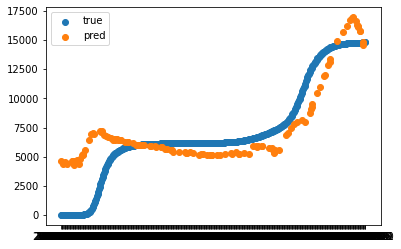

In [122]:
y2_pred = model(X2_test_nn).detach()
print(y2_pred.shape)
y2_pred_plt = np.array(scy2.inverse_transform(y2_pred))
y2_pred_plt = y2_pred_plt.reshape((-1, 1))
y2_plt = df['total_deaths'].values.reshape((-1, 1))

plt.scatter(dates2.values, y2_plt, label="true")
plt.scatter(dates2_test.values, y2_pred_plt, label="pred")
plt.legend()